# Práctica 6 - Adult Data Set

#### David Arroyo
### Facultad de Informática - Universidad Complutense de Madrid
* Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

* Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

* Prediction task is to determine whether a person makes over 50K a year.

**Tenéis que seleccionar diferentes algoritmos, tunear los hiperparámetros,
modificar features hasta que conseguir el mejor modelo.**

https://archive.ics.uci.edu/ml/datasets/adult

## Carga del dataset

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

headers = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'maritalstatus',
'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df = pd.read_csv("adult.data.csv", names=headers)  # leemos el dataset

adult_df.head()

,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Limpieza de datos
Eliminamos las filas que no contienen toda la información

In [2]:
adult_df = adult_df[adult_df.workclass != '?']
adult_df = adult_df[adult_df.education != '?']
adult_df = adult_df[adult_df.maritalstatus != '?']
adult_df = adult_df[adult_df.occupation != '?']
adult_df = adult_df[adult_df.relationship != '?']
adult_df = adult_df[adult_df.race != '?']
adult_df = adult_df[adult_df.sex != '?']
adult_df = adult_df[adult_df.native_country != '?']

# Las siguientes features no aportan valor, las eliminamos
adult_df.drop('fnlwgt', axis=1)
adult_df.drop('education_num', axis=1)  # misma información en la feature education
adult_df.drop('relationship', axis=1)

,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,5178,0,40,United-States,>50K


## Conversión de variables categóricas a numéricas

In [3]:
le = preprocessing.LabelEncoder()
adult_df['workclass'] = le.fit_transform(adult_df['workclass'])
adult_df['education'] = le.fit_transform(adult_df['education'])
adult_df['maritalstatus'] = le.fit_transform(adult_df['maritalstatus'])
adult_df['occupation'] = le.fit_transform(adult_df['occupation'])
adult_df['relationship'] = le.fit_transform(adult_df['relationship'])
adult_df['race'] = le.fit_transform(adult_df['race'])
adult_df['sex'] = le.fit_transform(adult_df['sex'])
adult_df['native_country'] = le.fit_transform(adult_df['native_country'])
adult_df['income'] = le.fit_transform(adult_df['income'])

## Separación de los datos de entrada de los de salida

In [4]:
X = adult_df.drop('income', axis=1)
y = adult_df['income']

In [5]:
classifier_scores = {}  # aquí almacenaremos el score de cada algoritmo

## Random Forest Classifier (tuneo de parámetros)

In [6]:
# Buscamos los mejores parámetros para el Random Forest
scores = []
my_range = range(1, 25)
for n in my_range:
    cf = RandomForestClassifier(n_estimators=n)
    scores.append(cross_val_score(cf, X, y, cv=5, scoring='accuracy').mean())
    
print scores

[0.8079297273908053, 0.828567953867355, 0.8297963372065169, 0.8410983410234907, 0.8406990734086544, 0.8439544366191072, 0.8442001510115282, 0.8473326358056896, 0.8469028018429217, 0.8487146949721801, 0.8467799941602336, 0.8500046967112835, 0.8500660981948407, 0.8521852345205639, 0.85025026020535, 0.849636136911586, 0.8512024948402193, 0.8538127958786642, 0.8518779677462313, 0.8514788463141757, 0.8533214896987353, 0.8520316152801183, 0.8533829996404847, 0.8539050372134204]


Random Forest accuracy: 85.34 %


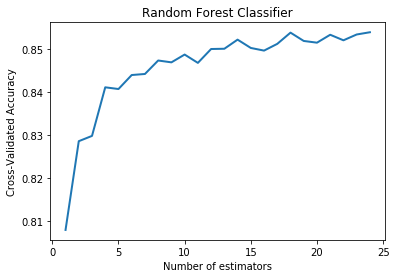

In [7]:
plt.plot(my_range, scores, '-', lw=2)
plt.title("Random Forest Classifier")
plt.xlabel('Number of estimators')
plt.ylabel('Cross-Validated Accuracy')

best_parameter = scores.index(max(scores)) + 1

cf = RandomForestClassifier(n_estimators=best_parameter, random_state=7)
random_forest_score = round(cross_val_score(cf, X, y, cv=5, scoring='accuracy').mean(), 4)

print 'Random Forest accuracy: %s %%' % (random_forest_score * 100)

classifier_scores.update({'Forest':random_forest_score})

## KNN con GridSearchCV para encontrar los mejores hiperparámetros

In [8]:
# parámetros que se buscarán
k_range = list(range(1, 5))
weight_options = ['uniform', 'distance']

In [9]:
# crear el grid de parámetros
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4], 'weights': ['uniform', 'distance']}


In [10]:
# instanciar el grid
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [11]:
# ajustar los datos con el grid
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [12]:
# ver los resultados
print grid.cv_results_.get('mean_test_score')

[0.73090507 0.73090507 0.78575597 0.73099721 0.75876048 0.75608857
 0.78922638 0.76081816]


In [13]:
# examinar el mejor resultado
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

classifier_scores.update({'KNN': grid.best_score_})

0.7892263751113295
{'n_neighbors': 4, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')


## DecisionTreeClassifier con GridSearchCV

In [14]:
# parámetros que se buscarán
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]
max_features = ['auto', 'sqrt', 'log2', None]

In [15]:
# crear el grid de parámetros
param_grid = dict(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features)
print(param_grid)

{'max_features': ['auto', 'sqrt', 'log2', None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3]}


In [16]:
# instanciar el grid
cf = DecisionTreeClassifier(random_state=7)
grid = GridSearchCV(cf, param_grid, cv=5, scoring='accuracy')

In [17]:
# ajustar los datos con el grid
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2', None], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [18]:
# ver los resultados
print grid.cv_results_.get('mean_test_score')

[0.81643684 0.81634471 0.82009152 0.83243758 0.83243758 0.83243758
 0.83655293 0.83655293 0.83655293 0.81643684 0.81634471 0.82009152
 0.83243758 0.83243758 0.83243758 0.83655293 0.83655293 0.83655293
 0.81643684 0.81634471 0.82009152 0.83243758 0.83243758 0.83243758
 0.83655293 0.83655293 0.83655293 0.80762262 0.80986456 0.81339639
 0.82015294 0.82015294 0.82015294 0.82147354 0.82147354 0.82147354]


In [19]:
# examinar el mejor resultado
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

classifier_scores.update({'DecissionTree': grid.best_score_})

0.8365529314210252
{'max_features': 'auto', 'min_samples_split': 2, 'min_samples_leaf': 3}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')


## AdaBoost

In [20]:
n_estimators = [64,]
learning_rate = [1,]

# crear el grid de parámetros
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
print(param_grid)

{'n_estimators': [64], 'learning_rate': [1]}


In [21]:
# instanciar el grid
ada = AdaBoostClassifier(random_state=7)
grid = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy')

In [22]:
# ajustar los datos con el grid
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=7),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [64], 'learning_rate': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [23]:
# ver los resultados
print grid.cv_results_.get('mean_test_score')

[0.86155216]


In [24]:
# examinar el mejor resultado
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

classifier_scores.update({'AdaBoost': grid.best_score_})

0.8615521636313381
{'n_estimators': 64, 'learning_rate': 1}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=64, random_state=7)


## Stochastic Gradient Descent

In [25]:
loss = ['hinge', 'perceptron', 'squared_loss']
penalty = ['l1', 'elasticnet']
learning_rate = ['optimal',]

# crear el grid de parámetros
param_grid = dict(loss=loss, penalty=penalty, learning_rate=learning_rate)
print(param_grid)

sgd = SGDClassifier()
grid = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')
# ajustar los datos con el grid
grid.fit(X, y)

# ver los resultados
print grid.cv_results_.get('mean_test_score')

# examinar el mejor resultado
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

classifier_scores.update({'SGD': grid.best_score_})

{'penalty': ['l1', 'elasticnet'], 'loss': ['hinge', 'perceptron', 'squared_loss'], 'learning_rate': ['optimal']}


C:\Users\David Arroyo\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[0.67393508 0.78182488 0.78124136 0.67700623 0.44798993 0.75931329]
0.7818248825281778
{'penalty': 'elasticnet', 'loss': 'hinge', 'learning_rate': 'optimal'}
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)


## Gradient Boosting tuneado con RandomizedSearchCV

In [28]:
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5]
n_estimators = list(range(100, 130))
criterion = ['friedman_mse', 'mse']

# crear el grid de parámetros
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, criterion=criterion)
print(param_grid)

gbc = GradientBoostingClassifier(random_state=7)

grid = RandomizedSearchCV(gbc, param_grid, cv=5, scoring='accuracy')
# ajustar los datos con el grid
grid.fit(X, y)

# ver los resultados
print grid.cv_results_.get('mean_test_score')

# examinar el mejor resultado
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

classifier_scores.update({'GBoost': grid.best_score_})

{'n_estimators': [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5], 'criterion': ['friedman_mse', 'mse']}
[0.87058137 0.8703971  0.87116489 0.86655815 0.87082706 0.8648383
 0.87227051 0.87076564 0.8727926  0.87098062]
0.8727926046497343
{'n_estimators': 109, 'learning_rate': 0.3, 'criterion': 'mse'}
GradientBoostingClassifier(criterion='mse', init=None, learning_rate=0.3,
              loss='deviance', max_depth=3, max_features=None,
              max_leaf_nodes=None, min_impurity_decrease=0.0,
              min_impurity_split=None, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=109, presort='auto', random_state=7,
              subsample=1.0, verbose=0, warm_start=False)


## Comparativas entre algoritmos

Mejor resultado con Gradient Boosting: 87.260834 %


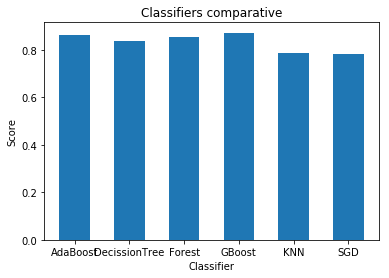

In [27]:
classifiers = list(classifier_scores.keys())
scores = list(classifier_scores.values())

plt.bar(classifiers, scores, width=1/1.8, )
plt.title("Classifiers comparative")
plt.xlabel('Classifier')
plt.ylabel('Score')

print "Mejor resultado con Gradient Boosting: %f %%" %  (classifier_scores.get('GBoost') * 100)